In [107]:
from IPython.core.interactiveshell import InteractiveShell  #执行该代码可以使得当前nb支持多输出
InteractiveShell.ast_node_interactivity = "all" 
import numpy as np
from datetime import datetime
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
pd.options.display.max_rows = 8  
%matplotlib inline

# 处理每一张单表的数据

准备语料库

jieba分词

下载搜狗词库”电商客服输入法“，https://pinyin.sogou.com/dict/detail/index/63253

采用深蓝词库转换

In [68]:
import jieba

       
dict1 = '../data/nlp/电商客服输入法.txt'
dict2 = '../data/nlp/电子商务专用词汇.txt'
jieba.load_userdict(dict1) # dict_为自定义词典的路径
jieba.load_userdict(dict2) # dict_为自定义词典的路径



# 去除停用词
# 使用预先准备的停用词表
tmpdf = pd.read_csv('../data/nlp/停用词.txt',
                    names = ['w'], sep = 'aaa', encoding = 'utf-8')
tmpdf.head()

import jieba.analyse as ana
ana.set_stop_words('../data/nlp/停用词.txt')

df= pd.read_csv(r'../data/taobao/new/评论数据/小米官方旗舰店.csv',skiprows =1 ,lineterminator="\n")       
df = df.iloc[:len(df)-2]['评价内容']
df

for i,value in enumerate(df):
#     res = jieba.cut(value)
    res = ana.extract_tags(value , topK = 50) # 使用TF-IDF算法提取关键词，并同时去掉停用词
    df[i] = ' '.join(res)
#     for i in jieba.lcut(value):
               
df        
        

D:\Anaconda3\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,w
0,","
1,，
2,、
3,；
4,:


0       电池续航：电池容量很大玩一天基本上没有问题，比较适合高强度的使用 而且小米的快充也非常不错哦...
1       Noto10pro的性价比挺高的，拍照挺清晰的🐱 🐱 外观颜值挺高的，电池续航挺耐用的，基本...
2       优点: 流畅，续航不错，高刷YYDS，LCD显示细腻，外放效果非常好，NFC 红外等基本功能...
3       手机已经收到了,用了2天才来评价,运行速度比我之前的小米5快多了,通话音质清晰,拍照效果还不...
                              ...                        
1996    送给妈**，外宽很奈斯，现在还没拆开，希望妈妈喜欢，红米手机好用又便宜，购买后评论还可以送小...
1997      小米手机无钱网络太差了，评个价都会网络断断续续，不能和华为手机比，差评，很垃圾，*******
1998             拍照效果：拍照很清晰 手机比较厚，不够薄，爸爸说总体还不错，另外送的保温杯很好 
1999                      拍照效果：图像清淅 电池续航：续航长 通信音质：；声音效果好 
Name: 评价内容, Length: 2000, dtype: object

0       不错 拍照 快充 处理器 视频 拍摄 电池容量 能充 80% 天矶 效果 屏幕显示 看图 质...
1       性价比 天玑 Noto10pro 颜值 一充 发烫 赞赞赞 真的 基带 奈斯 外放 续航 质...
2       YYDS 显示 高刷 LCD NFC 67W 充爽 miui 12.5 5G 比米 框易 买...
3       一充 通话音质 玩游戏 拍照 小米 天才 电池 清晰 评价 收到 两天 不错 手机 效果 运...
                              ...                        
1996               红米 奈斯 好用 背包 拆开 送给 便宜 评论 妈妈 手机 购买 喜欢 希望
1997                  评个 网络 手机 价都会 差评 无钱 华为 太差 小米 断断续续 垃圾
1998                             拍照 保温杯 清晰 爸爸 不错 手机 总体 效果
1999                           续航 清淅 效果 音质 拍照 图像 电池 通信 声音
Name: 评价内容, Length: 2000, dtype: object

# 词云展示¶


<Figure size 720x432 with 0 Axes>

(-0.5, 616.5, 441.5, -0.5)

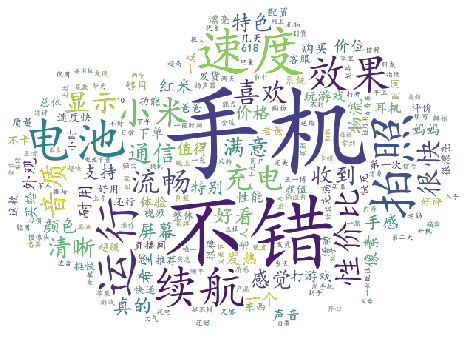

In [69]:
#词频统计
#遍历整个list ，对每个词条:
file_dict = { }
for i,value in enumerate(df):
    s = value.split(' ')
    for word in s:
        if word in file_dict:
            file_dict[word] += 1
        else:
            file_dict[word] = 1         
# file_dict 

# file_dict.keys()
import wordcloud
from imageio import imread
myfont = r'C:\Windows\Fonts\simkai.ttf'
txt_freq = file_dict
cloudobj = wordcloud.WordCloud(font_path = myfont, 
    width = 360, height = 180,
    mask = imread("../data/nlp/background.PNG"), 
    mode = "RGBA", background_color = None).fit_words(txt_freq)
#.generate(" ".join(file_dict.keys())) #把文本做词云，#文本需要用空格/标点符号分隔单词，否则不能正确分词  
print(cloudobj)

#显示词云
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))  # 设置图框大小尺寸
plt.imshow(cloudobj)
plt.axis("off")  #把坐标轴关掉
plt.show()

cloudobj.to_file("词云.png")
# wordcloud.WordCloud(font_path = myfont).generate(text).to_file(r"词云.png")

In [164]:
# 导入WordCloud及配置模块
from pyecharts import options as opts
from pyecharts.charts import WordCloud
from pyecharts.globals import SymbolType


#pyecharts需要的数据格式为二维数组:
#[['的' '232'],['情感' '119'],['和' '42']]

def create_wcloud(self):
    (
        WordCloud()
            .add(series_name="热词云图",
                 # 添加数据
                 data_pair=self,
                 # 字间隙
                 word_gap=5,
                 # 调整字大小范围
                 word_size_range=[15, 80],
                   # 词云图轮廓，有 'circle', 'cardioid', 'diamond', 'triangle-forward', 'triangle', 'pentagon', 'star' 可选
#                  shape="diamond"
                 # 选择背景图，也可以不加该参数，使用默认背景
#                  mask_image = r'../data/nlp/background (2).png'

            )
            .set_global_opts(
            title_opts=opts.TitleOpts(
                title="热词云图", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
            ),
            tooltip_opts=opts.TooltipOpts(is_show=True),
        )
            # 输出为html格式
            .render("testbasic.html")
    )

# WordCloud模块，链式调用配置，最终生成html文件
tuple0 = tuple(items for items in txt_freq.items())
create_wcloud(tuple0)

# 使用sklearn生成文档-词矩阵

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer(min_df = 2) # 在2个以上用户中出现的才保留

res = countvec.fit_transform(df)   #使用fit_transform函数生成bow稀疏矩阵
# countvec.get_feature_names() # 词汇列表，实际上就是获取每个行对应的词条
# countvec.vocabulary_ # 词条字典
res

res.todense()   #转换为标准格式的d2m矩阵
res.todense().shape


<2000x1684 sparse matrix of type '<class 'numpy.int64'>'
	with 22582 stored elements in Compressed Sparse Row format>

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

(2000, 1684)

# 关键词提取

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer


vectorizer = CountVectorizer() 

X = vectorizer.fit_transform(df) # 将文本中的词语转换为词频矩阵  

transformer = TfidfTransformer()  

tfidf = transformer.fit_transform(X)  #基于词频矩阵X计算TF-IDF值  
tfidf


tfidf.toarray() # 转换为数组

tfidf.todense() # 转换为矩阵

tfidf.todense().shape

print("字典长度：", len(vectorizer.vocabulary_))

vectorizer.vocabulary_

<2000x4256 sparse matrix of type '<class 'numpy.float64'>'
	with 25154 stored elements in Compressed Sparse Row format>

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

(2000, 4256)

字典长度： 4256


{'不错': 472,
 '拍照': 2244,
 '快充': 2060,
 '处理器': 1467,
 '视频': 3619,
 '拍摄': 2243,
 '电池容量': 3099,
 '能充': 3512,
 '80': 85,
 '天矶': 1571,
 '效果': 2391,
 '屏幕显示': 1844,
 '看图': 3187,
 '质量': 3728,
 '大猩猩': 1552,
 '玩完': 3022,
 '续航': 3420,
 '性价比': 2082,
 '小米': 1821,
 '旗舰': 2443,
 '高强度': 4219,
 '鲜艳': 4241,
 '价位': 672,
 '电池': 3098,
 '品质': 1347,
 '清晰': 2873,
 '玻璃': 3037,
 '色彩': 3550,
 '适合': 3955,
 '半个': 1101,
 '图片': 1422,
 '手机': 2177,
 '小时': 1817,
 '运行': 3868,
 '真的': 3211,
 '速度': 3976,
 '整体': 2401,
 '明白': 2493,
 '很大': 2006,
 '显示': 2517,
 '天玑': 1570,
 'noto10pro': 177,
 '颜值': 4176,
 '一充': 243,
 '发烫': 1210,
 '赞赞赞': 3755,
 '基带': 1449,
 '奈斯': 1628,
 '外放': 1483,
 '质感': 3727,
 '耐用': 3483,
 '块钱': 1443,
 '买到': 579,
 '一千': 255,
 '流畅': 2841,
 '外观': 1486,
 '信号': 757,
 '声音': 1465,
 'yyds': 220,
 '高刷': 4214,
 'lcd': 137,
 'nfc': 157,
 '67w': 74,
 '充爽': 811,
 'miui': 143,
 '12': 9,
 '5g': 58,
 '比米': 2762,
 '框易': 2700,
 '买买': 575,
 '功能齐全': 1044,
 '无息': 2454,
 '中规中矩': 536,
 '侧边': 739,
 '指纹': 2260,
 '无线': 2461,
 '室外': 17

# 抽取文档主题

In [14]:
# 设定LDA模型
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10
ldamodel = LatentDirichletAllocation(n_components = n_topics)

In [15]:
# 拟合LDA模型
ldamodel.fit(tfidf)

LatentDirichletAllocation()

In [16]:
# 拟合后模型的实质
print(ldamodel.components_.shape)
ldamodel.components_[:2]

(10, 4256)


array([[0.1       , 0.10000356, 0.36894806, ..., 0.2709622 , 0.1       ,
        0.10000001],
       [0.10002839, 1.82538563, 2.02723697, ..., 0.1       , 0.1       ,
        0.10004962]])

In [17]:
# 主题词打印函数
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i] 
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [18]:
#打印出前十个主题的10个关键词信息
n_top_words = 10
tf_feature_names = vectorizer.get_feature_names()
print_top_words(ldamodel, tf_feature_names, n_top_words)

Topic #0:
儿子 用过 母亲 一如既往 功能 超赞 完整 喜欢 小米 好用
Topic #1:
手机 小米 收到 不错 喜欢 性价比 很快 物流 满意 流畅
Topic #2:
父亲节 礼物 款式 手机 爸爸 父亲 喜欢 性价比 送给 奈斯
Topic #3:
手机 小米 老公 长辈 不错 做工 下载 半个 功能 一家人
Topic #4:
电池 拍照 运行 速度 续航 效果 不错 手机 音质 显示
Topic #5:
支持 王一博 百香果 代言 一博 姐姐 摩托 代言人 性价比 粉丝
Topic #6:
信赖 小米 还会 想象 喜欢 红米 爸爸 一如既往 支持 棒棒
Topic #7:
两千元 智能 回来 小爱 同学 反正 听歌 不高 一流 提升
Topic #8:
爸爸 手机 小米 喜欢 充电 性价比 一段时间 挺好用 赶上 感觉
Topic #9:
一如既往 同事 相比 划算 真不错 一张 活动 价位 手机卡 顶级



# 获取每家店铺的情感值得分

In [19]:
from snownlp import SnowNLP

sen_total = []
for topic_idx, topic in enumerate(ldamodel.components_):
    sum_ = 0
    str_topic = np.array([tf_feature_names[i] 
                    for i in topic.argsort()[:-n_top_words - 1:-1]])
    for i in str_topic:     #对每个主题的情绪值求和
           sum_ += SnowNLP(i).sentiments
   
    sen_total.append(sum_)

sen_total = np.array(sen_total)
sen_avg = sen_total.mean()  #对各个主题求平均
sen_avg            

6.920094006312974

# 评论中负面评论所占的比重

In [20]:
grades = [ ]
neg_grades = []
for i, value in enumerate(df):
    sum_ = 0 
    for j in value.split(" "):
        sum_+= SnowNLP(j).sentiments
    avg_word = sum_/len(value.split(" "))  
    
    if avg_word < 0.5:
        neg_grades.append(avg_word)
    grades.append(avg_word)    
# grades        
ratio =len( neg_grades)/len(grades)
ratio    

0.0905

# 从词频的角度获取每家店铺的综合得分

In [147]:
file_all = pd.DataFrame()
file_all['词频综合'] = 0
file_all['店铺名称'] = names

for parent,dirnames,filenames in os.walk(r'../data/taobao/new/评论数据/'):
    for filename in filenames:
        
#         print(filename[0:-4])
#         print(parent+filename)
        df = pd.read_csv(parent+filename,skiprows =1,lineterminator="\n") 
        df = df.iloc[:len(df)-2]['评价内容']
        
        #分词
        dict1 = '../data/nlp/电商客服输入法.txt'
        dict2 = '../data/nlp/电子商务专用词汇.txt'
        jieba.load_userdict(dict1) # dict_为自定义词典的路径
        jieba.load_userdict(dict2) # dict_为自定义词典的路径


        # 去除停用词
        ana.set_stop_words('../data/nlp/停用词.txt')

        for i,value in enumerate(df):
            res = ana.extract_tags(value , topK = 50) # 使用TF-IDF算法提取关键词，并同时去掉停用词
            df[i] = ' '.join(res)
                         
        str_sum = ""  #把一篇文章的所有评论综合在一起
        for i in df:
            str_sum += i
#         print(str_sum)
  
#         file_all[file_all['店铺名称'] == filename[0:-4]]['词频综合得分'] = str_sum
        for i,filename2 in enumerate(file_all['店铺名称']):
            if filename2.strip() == filename[0:-4].strip():
                file_all['词频综合'][i] = str_sum   
                
        

#         print(file_all[file_all['店铺名称'] == filename]['词频综合得分'])
file_all.to_csv(r'../data/taobao/new/nlp词频综合.csv',encoding="utf_8_sig")
        
#         print(df)

D:\Anaconda3\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [148]:
file_all = pd.read_csv(r'../data/taobao/new/nlp词频综合.csv')
file_all = file_all.set_index("店铺名称", drop=True)['词频综合']
file_all[file_all.isnull()==True]
file_all = file_all.dropna()
file_all

#特征提取
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(file_all) # 将文本中的词语转换为词频矩阵  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)  #基于词频矩阵X计算TF-IDF值  
tfidf

tfidf.toarray() # 转换为数组
# tfidf.todense() # 转换为矩阵
tfidf.todense().shape
# print("字典长度：", len(vectorizer.vocabulary_))
# vectorizer.vocabulary_

店铺名称
艾美特官方旗舰店      NaN
dji大疆官方旗舰店    NaN
Name: 词频综合, dtype: object

店铺名称
小米官方旗舰店        不错 拍照 快充 处理器 视频 拍摄 电池容量 能充 80% 天矶 效果 屏幕显示 看图 质...
闪魔旗舰店          贴合 手感 钢化 触屏 蓝光 严严实实 性价比 材质 强硬 实惠 灵敏 这款 光滑 细腻 尺...
绿联数码旗舰店        折不断 qaq 丝滑 防窥膜 林林总总 撕下来 服务态度 起泡 输油 手感 品质 没什么 那...
baseus倍思旗舰店    耳机 充电 仓里 蓝牙 挺不错 没电 杂音 音质 双耳 质感 佩戴 稳固 做工 脱落 细致 ...
                                     ...                        
魅幻电器旗舰店        够买 换上 规格 合适 放心 标准霉迹 密封性 密封条 换过 斑斑 焕然一新 冰箱 宝贝 尺...
斗蒙电器旗舰店        好差 前两天 一分钟 整整 太阳 质量 一个 真的光顾 欣喜 快去 宝贝 安装 收到服务态度...
doremi旗舰店      耳朵 高低音 耳朵痛 跑步 佩戴 健身 立体 牢固 不适 精致 舒服 包装 清晰 感受 音乐...
卓饰蕊车品旗舰店       做工 风量 物有所值 性价比 精细 外观 满意 评价 质量 整体 情况调节开关 对了 档位 ...
Name: 词频综合, Length: 141, dtype: object

<141x141986 sparse matrix of type '<class 'numpy.float64'>'
	with 370653 stored elements in Compressed Sparse Row format>

array([[0.00140908, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

(141, 141986)

In [ ]:
# 导入WordCloud及配置模块
from pyecharts import options as opts
from pyecharts.charts import WordCloud
from pyecharts.globals import SymbolType


file_dict = { }
for i,value in enumerate(file_all):
    s = value.split(' ')
    for word in s:
        if word in file_dict:
            file_dict[word] += 1
        else:
            file_dict[word] = 1    
            

#pyecharts需要的数据格式为二维数组:
#[['的' '232'],['情感' '119'],['和' '42']]

def create_wcloud(self):
    (
        WordCloud()
            .add(series_name="热词云图_电器",
                 # 添加数据
                 data_pair=self,
                 # 字间隙
                 word_gap=5,
                 # 调整字大小范围
                 word_size_range=[15, 80],
                   # 词云图轮廓，有 'circle', 'cardioid', 'diamond', 'triangle-forward', 'triangle', 'pentagon', 'star' 可选
#                  shape="diamond"
                 # 选择背景图，也可以不加该参数，使用默认背景
#                  mask_image = r'../data/nlp/background (2).png'

            )
            .set_global_opts(
            title_opts=opts.TitleOpts(
                title="热词云图_电器", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
            ),
            tooltip_opts=opts.TooltipOpts(is_show=True),
        )
            # 输出为html格式
            .render("热词云图_test.html")
    )

# WordCloud模块，链式调用配置，最终生成html文件
tuple0 = tuple(items for items in file_dict.items())
create_wcloud(tuple0)

# 获取食品数据

In [167]:
tmp = pd.read_excel(r'../data/taobao/new/shipin_plus.xlsx')


file_all2 = pd.DataFrame()
file_all2['词频综合'] = 0
file_all2['店铺名称'] = tmp['店铺名字']

for parent,dirnames,filenames in os.walk(r'../data/taobao/new/评论数据_食品/'):
    for filename in filenames:
        
#         print(filename[0:-4])
#         print(parent+filename)
        df = pd.read_csv(parent+filename,skiprows =1,lineterminator="\n") 
        df = df.iloc[:len(df)-2]['评价内容']
        
        #分词
        dict1 = '../data/nlp/电商客服输入法.txt'
        dict2 = '../data/nlp/电子商务专用词汇.txt'
        jieba.load_userdict(dict1) # dict_为自定义词典的路径
        jieba.load_userdict(dict2) # dict_为自定义词典的路径


        # 去除停用词
        ana.set_stop_words('../data/nlp/停用词.txt')

        for i,value in enumerate(df):
            res = ana.extract_tags(value , topK = 50) # 使用TF-IDF算法提取关键词，并同时去掉停用词
            df[i] = ' '.join(res)
                         
        str_sum = ""  #把一篇文章的所有评论综合在一起
        for i in df:
            str_sum += i
#         print(str_sum)
  
#         file_all[file_all['店铺名称'] == filename[0:-4]]['词频综合得分'] = str_sum
        for i,filename2 in enumerate(file_all2['店铺名称']):
            if filename2.strip() == filename[0:-4].strip():
                file_all2['词频综合'][i] = str_sum   
                
        

#         print(file_all[file_all['店铺名称'] == filename]['词频综合得分'])
file_all2.to_csv(r'../data/taobao/new/nlp词频综合_食品.csv',encoding="utf_8_sig")
        
#         print(df)

D:\Anaconda3\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [170]:
file_all2 = pd.read_csv(r'../data/taobao/new/nlp词频综合_食品.csv')
file_all2 = file_all2.set_index("店铺名称", drop=True)['词频综合']
file_all2[file_all2.isnull()==True]
file_all2 = file_all2.dropna()
file_all2

#特征提取
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(file_all2) # 将文本中的词语转换为词频矩阵  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)  #基于词频矩阵X计算TF-IDF值  
tfidf

tfidf.toarray() # 转换为数组
# tfidf.todense() # 转换为矩阵
tfidf.todense().shape
# print("字典长度：", len(vectorizer.vocabulary_))
# vectorizer.vocabulary_

店铺名称
良品铺子旗舰店      NaN
鲨鱼菲特旗舰店      NaN
零趣食品旗舰店      NaN
肌肉小王子旗舰店     NaN
            ... 
零度果坊食品旗舰店    NaN
罗锦记食品旗舰店     NaN
蜜之番旗舰店       NaN
鑫炳记旗舰店       NaN
Name: 词频综合, Length: 38, dtype: object

店铺名称
百草味旗舰店      凤爪 藕片 果干 张哲瀚 海哲会 哲瀚 甜辣 无骨 瀚海 百草 保质期 辣味 一点 坚果 一...
三只松鼠旗舰店     坚果 好吃 中缝 果干 还套 摇一摇 香脆 nb 健康 酸甜 腰果 心脑血管 份量 口感 换...
比比赞旗舰店      分量 不错 好吃 新鲜度 保质期 口感 包装 味道 品质 满意 商品酥脆 口味 超好 超棒 ...
尚巧厨旗舰店      冰袋 没化 蛋挞 不错 挞皮 现做 太棒 总怕 酥脆 严实 一点 好吃 分量 好几个 变形 ...
                                  ...                        
名仁旗舰店       不错 品相 难易 口感 配件 溶解 外观 包装 味道 品质 肯定口感 发货 破损 优惠 瓶装...
盛源来食品旗舰店    裙带菜 先给 好评 买来 视频 宝宝 营养賣家 裙帶 泡發 味道 物流 寶貝 嚴實 乾淨 沒...
文和友官方旗舰店    香辣 过瘾 正宗 口味 味道小龙虾 味道 新鲜 不错 放心 购买挺香 买少 买点 好评 好吃...
渝美滋食品旗舰店    豆干 味道 不错 cj 麻辣味 店豆 几袋 购买 喜欢 光顾 客服 下次 一包 好吃 这家 ...
Name: 词频综合, Length: 112, dtype: object

<112x126097 sparse matrix of type '<class 'numpy.float64'>'
	with 307426 stored elements in Compressed Sparse Row format>

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(112, 126097)

In [173]:
# 导入WordCloud及配置模块
from pyecharts import options as opts
from pyecharts.charts import WordCloud
from pyecharts.globals import SymbolType


file_dict = { }
for i,value in enumerate(file_all2):
    s = value.split(' ')
    for word in s:
        if word in file_dict:
            file_dict[word] += 1
        else:
            file_dict[word] = 1    
            

#pyecharts需要的数据格式为二维数组:
#[['的' '232'],['情感' '119'],['和' '42']]

def create_wcloud(self):
    (
        WordCloud()
            .add(series_name="热词云图_食品",
                 # 添加数据
                 data_pair=self,
                 # 字间隙
                 word_gap=5,
                 # 调整字大小范围
                 word_size_range=[15, 80],
                   # 词云图轮廓，有 'circle', 'cardioid', 'diamond', 'triangle-forward', 'triangle', 'pentagon', 'star' 可选
#                  shape="diamond"
                 # 选择背景图，也可以不加该参数，使用默认背景
#                  mask_image = r'../data/nlp/background (2).png'

            )
            .set_global_opts(
            title_opts=opts.TitleOpts(
                title="热词云图_食品", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
            ),
            tooltip_opts=opts.TooltipOpts(is_show=True),
        )
            # 输出为html格式
            .render("热词云图_食品.vue")
    )

# WordCloud模块，链式调用配置，最终生成html文件
tuple0 = tuple(items for items in file_dict.items())
create_wcloud(tuple0[0:50])

# Kmeans聚类

In [150]:
# 参数初始化
outputfile = '../data/taobao/new/data_type.xls'  # 保存结果的文件名
k = 6  # 聚类的类别
iteration = 500  # 聚类最大循环次数
data = pd.DataFrame(tfidf.toarray())
data_zs = 1.0*(data - data.mean())/data.std()  # 数据标准化

from sklearn.cluster import KMeans
model = KMeans(n_clusters = k, n_jobs = 8, max_iter = iteration,random_state=1234)  # 分为k类，并发数8
model.fit(data_zs)  # 开始聚类

# 简单打印结果
r1 = pd.Series(model.labels_).value_counts()  # 统计各个类别的数目
r2 = pd.DataFrame(model.cluster_centers_)  # 找出聚类中心
r = pd.concat([r2, r1], axis = 1)  # 横向连接（0是纵向），得到聚类中心对应的类别下的数目
# r.columns = ['店铺名称'] + ['类别数目']  # 重命名表头
pd.Series(model.labels_).value_counts()  # 统计各个类别的数目

model.labels_
print(r)

# 详细输出原始数据及其类别
r = pd.Series(model.labels_, index = file_all.index)   # 详细输出每个样本对应的类别
# r.columns = list(data.columns) + ['聚类类别']  # 重命名表头
r.to_excel(outputfile)  # 保存结果


# pic_output = '../data/tmp/pd'  # 概率密度图文件名前缀
# for i in range(k):
#     density_plot(data[r[u'聚类类别']==i]).savefig(u'%s%s.png' %(pic_output, i))
 

D:\Anaconda3\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


KMeans(max_iter=500, n_clusters=6, n_jobs=8, random_state=1234)

0    136
5      1
4      1
3      1
2      1
1      1
dtype: int64

array([0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

     0         1          2         3         4         5         6       \
0  0.006200  0.003096  -0.084215  0.003628  0.003096  0.003096  0.003096   
1 -0.168641 -0.084215  -0.084215 -0.098680 -0.084215 -0.084215 -0.084215   
2 -0.168641 -0.084215  11.790127 -0.098680 -0.084215 -0.084215 -0.084215   
3 -0.168641 -0.084215  -0.084215 -0.098680 -0.084215 -0.084215 -0.084215   
4 -0.168641 -0.084215  -0.084215 -0.098680 -0.084215 -0.084215 -0.084215   
5 -0.168641 -0.084215  -0.084215 -0.098680 -0.084215 -0.084215 -0.084215   

     7         8         9       ...    141977    141978    141979    141980  \
0  0.003096  0.003628  0.004976  ...  0.003096  0.003096  0.003096  0.003096   
1 -0.084215 -0.098680 -0.135351  ... -0.084215 -0.084215 -0.084215 -0.084215   
2 -0.084215 -0.098680 -0.135351  ... -0.084215 -0.084215 -0.084215 -0.084215   
3 -0.084215 -0.098680 -0.135351  ... -0.084215 -0.084215 -0.084215 -0.084215   
4 -0.084215 -0.098680 -0.135351  ... -0.084215 -0.084215 -0.084215 

,0,1,2,3,4,5,6,7,8,9,...,128268,128269,128270,128271,128272,128273,128274,128275,128276,聚类类别
0,0.00162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
飞利浦厨房电器旗舰店,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
飞科科品专卖店,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
魅幻电器旗舰店,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
龟派车品旗舰店,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


array([[  35.83133   ,  107.36375   ],
       [-155.39523   ,   94.04715   ],
       [-182.32874   ,  -22.880293  ],
       [  29.657175  ,  -86.07335   ],
       [ 192.27367   ,  -72.16087   ],
       [  67.35829   ,  168.41643   ],
       [  81.6962    ,   60.740295  ],
       [ 111.096725  ,   51.898212  ],
       [  48.922623  ,  -58.580486  ],
       [-149.20058   ,   11.601023  ],
       [  99.44183   ,   -1.5431355 ],
       [  65.27766   , -186.3139    ],
       [  33.7931    , -153.78789   ],
       [ 140.0733    ,  -54.325195  ],
       [ 149.39291   ,  124.07225   ],
       [ 146.08844   ,   41.391018  ],
       [ -83.37688   ,  -73.14305   ],
       [ -34.692154  ,  187.43698   ],
       [ 127.95138   , -163.87337   ],
       [ -50.850304  ,  -17.889576  ],
       [  -7.819472  ,   29.272299  ],
       [-125.75997   ,  -18.154293  ],
       [  19.372498  ,    9.913868  ],
       [ -72.145004  ,   67.38943   ],
       [  55.565845  , -117.94148   ],
       [ -86.09169   , -1

D:\Anaconda3\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


D:\Anaconda3\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


D:\Anaconda3\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


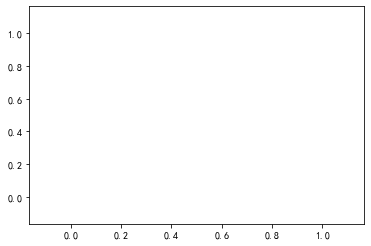

In [114]:
import pandas as pd
from sklearn.manifold import TSNE  #TSNE可视化

# 详细输出原始数据及其类别
r = pd.concat([data, pd.Series(model.labels_, index = file_all.index)], axis = 1)   # 详细输出每个样本对应的类别
r.columns = list(data.columns) + ['聚类类别']  # 重命名表头
r

tsne = TSNE(random_state=123)
tsne.fit_transform(data_zs)  # 进行数据降维
tsne = pd.DataFrame(tsne.embedding_, index = data_zs.index)  # 转换数据格式

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 不同类别用不同颜色和样式绘图
d = tsne[r['聚类类别'] == 0]
plt.plot(d[0], d[1], 'r.')
d = tsne[r['聚类类别'] == 1]
plt.plot(d[0], d[1], 'go')
d = tsne[r['聚类类别'] == 2]
plt.plot(d[0], d[1], 'b*')
plt.show()

In [151]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

db = DBSCAN(eps=1.1,min_samples=2, n_jobs=4).fit(data)

r = pd.Series(db.labels_, index =file_all.index)   # 详细输出每个样本对应的类别

r.to_excel(r'../data/taobao/new/data_type2.xls')
print(r.sort_values())

店铺名称
aca北美电器官方旗舰店   -1
自然之门旗舰店        -1
卡邦仕旗舰店         -1
飞利浦厨房电器旗舰店     -1
               ..
jado捷渡车品旗舰店     6
hp惠普车品官方旗舰店     6
博莱克电器旗舰店        7
美的厨房电器旗舰店       7
Length: 141, dtype: int64


# 把所有文章综合起来

In [35]:
tmp = pd.read_excel('../data/taobao/new/天猫电器店铺数据.xlsx')

names = tmp['店铺名字']  #得到所有店铺的名称列表


In [36]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import re
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from snownlp import SnowNLP
import jieba.analyse as ana


sen_avg_list= []  #综合情感值得分列表
grades_list = [] #负面评论所占比重列表

for parent,dirnames,filenames in os.walk(r'../data/taobao/new/评论数据/'):
    for filename in filenames:
        #root 所指的是当前正在遍历的这个文件夹的本身的地址
        #dirs 是一个 list ，内容是该文件夹中所有的目录的名字(不包括子目录)
        #files 同样是 list , 内容是该文件夹中所有的文件(不包括子目录)

#         print(parent+filename)
        df = pd.read_csv(parent+filename,skiprows =1,lineterminator="\n") 
        df = df.iloc[:len(df)-2]['评价内容']
#         print(df)
        
        #分词
        dict1 = '../data/nlp/电商客服输入法.txt'
        dict2 = '../data/nlp/电子商务专用词汇.txt'
        jieba.load_userdict(dict1) # dict_为自定义词典的路径
        jieba.load_userdict(dict2) # dict_为自定义词典的路径



        # 去除停用词
        # 使用预先准备的停用词表
#         tmpdf = pd.read_csv('../data/nlp/停用词.txt',
#                             names = ['w'], sep = 'aaa', encoding = 'utf-8')
#         tmpdf.head()

        ana.set_stop_words('../data/nlp/停用词.txt')

        for i,value in enumerate(df):
            res = ana.extract_tags(value , topK = 50) # 使用TF-IDF算法提取关键词，并同时去掉停用词
            df[i] = ' '.join(res)
  
        
    
        #特征提取
        vectorizer = CountVectorizer() 
        X = vectorizer.fit_transform(df) # 将文本中的词语转换为词频矩阵  
        transformer = TfidfTransformer()  
        tfidf = transformer.fit_transform(X)  #基于词频矩阵X计算TF-IDF值  
        tfidf


#         tfidf.toarray() # 转换为数组
#         tfidf.todense() # 转换为矩阵
#         tfidf.todense().shape
#         print("字典长度：", len(vectorizer.vocabulary_))
#         vectorizer.vocabulary_
        
        #抽取文档主题
        # 设定LDA模型
        n_topics = 10
        ldamodel = LatentDirichletAllocation(n_components = n_topics)
        
        # 拟合LDA模型
        ldamodel.fit(tfidf)
        
        # 拟合后模型的实质
#         print(ldamodel.components_.shape)
#         ldamodel.components_[:2]

        
        #打印出前十个主题的10关键词信息
        n_top_words = 10
        tf_feature_names = vectorizer.get_feature_names()

        #--------------------------------------------------------------------------------------
        #获取每家店铺的情感值得分  
        sen_total = []
        for topic_idx, topic in enumerate(ldamodel.components_):
            sum_ = 0
            str_topic = np.array([tf_feature_names[i] 
                            for i in topic.argsort()[:-n_top_words - 1:-1]])
            if len(str_topic) > 0 :
                for i in str_topic:     #对每个主题的情绪值求和
                   sum_ += SnowNLP(i).sentiments

            else:
                sum_ = 0
            sen_total.append(sum_)

        sen_total = np.array(sen_total)
        sen_avg = sen_total.mean()  #对各个主题求平均
        sen_avg_list.append(sen_avg)   
        #--------------------------------------------------------------------------------------
        
        
        #--------------------------------------------------------------------------------------
        #获取负面评论
        grades = []
        neg_grades = []
        try:
            for i, value in enumerate(df):
                sum_ = 0 
                for j in value.split(" "):
                    sum_+= SnowNLP(j).sentiments
                avg_word = sum_/len(value.split(" "))  
                
                
                if avg_word < 0.5:
                    neg_grades.append(avg_word)
                grades.append(avg_word)    
           
        except:
            avg_word = 0
            neg_grades.append(avg_word)
            grades.append(avg_word)    
            pass

       
        # grades        
        ratio =len( neg_grades)/len(grades)
        grades_list.append(ratio)  
        #--------------------------------------------------------------------------------------
        

sen_avg_list
grades_list


to_file = pd.DataFrame(sen_avg_list)
to_file['负面评论比重'] = grades_list
to_file['店铺名称'] = names
to_file.to_csv(r'../data/taobao/new/nlp特征.csv',encoding="utf_8_sig")
    

<2000x3624 sparse matrix of type '<class 'numpy.float64'>'
	with 26446 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1570 sparse matrix of type '<class 'numpy.float64'>'
	with 18043 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2610 sparse matrix of type '<class 'numpy.float64'>'
	with 21681 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2291 sparse matrix of type '<class 'numpy.float64'>'
	with 19278 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x819 sparse matrix of type '<class 'numpy.float64'>'
	with 6381 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1909 sparse matrix of type '<class 'numpy.float64'>'
	with 14645 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1668 sparse matrix of type '<class 'numpy.float64'>'
	with 8172 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1983 sparse matrix of type '<class 'numpy.float64'>'
	with 11233 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1953 sparse matrix of type '<class 'numpy.float64'>'
	with 14209 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1893 sparse matrix of type '<class 'numpy.float64'>'
	with 10315 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1495 sparse matrix of type '<class 'numpy.float64'>'
	with 7873 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2112 sparse matrix of type '<class 'numpy.float64'>'
	with 14937 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<575x486 sparse matrix of type '<class 'numpy.float64'>'
	with 2313 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2706 sparse matrix of type '<class 'numpy.float64'>'
	with 15814 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<481x321 sparse matrix of type '<class 'numpy.float64'>'
	with 1599 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<1723x1162 sparse matrix of type '<class 'numpy.float64'>'
	with 7106 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1069 sparse matrix of type '<class 'numpy.float64'>'
	with 12719 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2574 sparse matrix of type '<class 'numpy.float64'>'
	with 15047 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1715 sparse matrix of type '<class 'numpy.float64'>'
	with 10006 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2102 sparse matrix of type '<class 'numpy.float64'>'
	with 14131 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1921 sparse matrix of type '<class 'numpy.float64'>'
	with 13672 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<862x557 sparse matrix of type '<class 'numpy.float64'>'
	with 3169 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2111 sparse matrix of type '<class 'numpy.float64'>'
	with 14371 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2482 sparse matrix of type '<class 'numpy.float64'>'
	with 13192 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1704 sparse matrix of type '<class 'numpy.float64'>'
	with 10275 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1871 sparse matrix of type '<class 'numpy.float64'>'
	with 13274 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2926 sparse matrix of type '<class 'numpy.float64'>'
	with 20793 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<146x51 sparse matrix of type '<class 'numpy.float64'>'
	with 471 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2843 sparse matrix of type '<class 'numpy.float64'>'
	with 17188 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 6562 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1795 sparse matrix of type '<class 'numpy.float64'>'
	with 14670 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1617 sparse matrix of type '<class 'numpy.float64'>'
	with 8671 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1844 sparse matrix of type '<class 'numpy.float64'>'
	with 13133 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2366 sparse matrix of type '<class 'numpy.float64'>'
	with 13854 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x815 sparse matrix of type '<class 'numpy.float64'>'
	with 6971 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1413 sparse matrix of type '<class 'numpy.float64'>'
	with 8582 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2286 sparse matrix of type '<class 'numpy.float64'>'
	with 13301 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1485 sparse matrix of type '<class 'numpy.float64'>'
	with 10714 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<1115x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 5270 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1040 sparse matrix of type '<class 'numpy.float64'>'
	with 7386 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1353 sparse matrix of type '<class 'numpy.float64'>'
	with 7572 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2203 sparse matrix of type '<class 'numpy.float64'>'
	with 23608 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2645 sparse matrix of type '<class 'numpy.float64'>'
	with 18697 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1959 sparse matrix of type '<class 'numpy.float64'>'
	with 10685 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1447 sparse matrix of type '<class 'numpy.float64'>'
	with 10336 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x913 sparse matrix of type '<class 'numpy.float64'>'
	with 6594 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2322 sparse matrix of type '<class 'numpy.float64'>'
	with 11777 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2310 sparse matrix of type '<class 'numpy.float64'>'
	with 13182 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<1721x800 sparse matrix of type '<class 'numpy.float64'>'
	with 6990 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x3075 sparse matrix of type '<class 'numpy.float64'>'
	with 18724 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2172 sparse matrix of type '<class 'numpy.float64'>'
	with 13194 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1919 sparse matrix of type '<class 'numpy.float64'>'
	with 14560 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1753 sparse matrix of type '<class 'numpy.float64'>'
	with 14018 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1448 sparse matrix of type '<class 'numpy.float64'>'
	with 7240 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2218 sparse matrix of type '<class 'numpy.float64'>'
	with 13899 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1177 sparse matrix of type '<class 'numpy.float64'>'
	with 7896 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1736 sparse matrix of type '<class 'numpy.float64'>'
	with 10931 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1843 sparse matrix of type '<class 'numpy.float64'>'
	with 10372 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2633 sparse matrix of type '<class 'numpy.float64'>'
	with 16897 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1849 sparse matrix of type '<class 'numpy.float64'>'
	with 9378 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2236 sparse matrix of type '<class 'numpy.float64'>'
	with 13902 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2470 sparse matrix of type '<class 'numpy.float64'>'
	with 15226 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2467 sparse matrix of type '<class 'numpy.float64'>'
	with 16747 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2148 sparse matrix of type '<class 'numpy.float64'>'
	with 10809 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x971 sparse matrix of type '<class 'numpy.float64'>'
	with 8832 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2797 sparse matrix of type '<class 'numpy.float64'>'
	with 20705 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1974 sparse matrix of type '<class 'numpy.float64'>'
	with 9093 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2190 sparse matrix of type '<class 'numpy.float64'>'
	with 14171 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2157 sparse matrix of type '<class 'numpy.float64'>'
	with 14015 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2796 sparse matrix of type '<class 'numpy.float64'>'
	with 18166 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<1237x1274 sparse matrix of type '<class 'numpy.float64'>'
	with 6463 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2146 sparse matrix of type '<class 'numpy.float64'>'
	with 15281 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x4308 sparse matrix of type '<class 'numpy.float64'>'
	with 25405 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2158 sparse matrix of type '<class 'numpy.float64'>'
	with 16900 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2031 sparse matrix of type '<class 'numpy.float64'>'
	with 9285 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1436 sparse matrix of type '<class 'numpy.float64'>'
	with 13129 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1030 sparse matrix of type '<class 'numpy.float64'>'
	with 11057 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1102 sparse matrix of type '<class 'numpy.float64'>'
	with 8056 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2278 sparse matrix of type '<class 'numpy.float64'>'
	with 17253 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1719 sparse matrix of type '<class 'numpy.float64'>'
	with 12122 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2317 sparse matrix of type '<class 'numpy.float64'>'
	with 14476 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2185 sparse matrix of type '<class 'numpy.float64'>'
	with 11594 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1111 sparse matrix of type '<class 'numpy.float64'>'
	with 8043 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<1965x835 sparse matrix of type '<class 'numpy.float64'>'
	with 7112 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1595 sparse matrix of type '<class 'numpy.float64'>'
	with 13020 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x653 sparse matrix of type '<class 'numpy.float64'>'
	with 6423 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1906 sparse matrix of type '<class 'numpy.float64'>'
	with 9367 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2333 sparse matrix of type '<class 'numpy.float64'>'
	with 12031 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2145 sparse matrix of type '<class 'numpy.float64'>'
	with 11447 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2698 sparse matrix of type '<class 'numpy.float64'>'
	with 14276 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<1325x1622 sparse matrix of type '<class 'numpy.float64'>'
	with 9863 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2259 sparse matrix of type '<class 'numpy.float64'>'
	with 15354 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<514x693 sparse matrix of type '<class 'numpy.float64'>'
	with 3234 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<1949x1168 sparse matrix of type '<class 'numpy.float64'>'
	with 7879 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<1988x652 sparse matrix of type '<class 'numpy.float64'>'
	with 6119 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1366 sparse matrix of type '<class 'numpy.float64'>'
	with 9039 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1972 sparse matrix of type '<class 'numpy.float64'>'
	with 12901 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1442 sparse matrix of type '<class 'numpy.float64'>'
	with 12724 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<710x758 sparse matrix of type '<class 'numpy.float64'>'
	with 4399 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1480 sparse matrix of type '<class 'numpy.float64'>'
	with 12749 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<933x614 sparse matrix of type '<class 'numpy.float64'>'
	with 3665 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2173 sparse matrix of type '<class 'numpy.float64'>'
	with 12549 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<1166x697 sparse matrix of type '<class 'numpy.float64'>'
	with 4562 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1597 sparse matrix of type '<class 'numpy.float64'>'
	with 11296 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1409 sparse matrix of type '<class 'numpy.float64'>'
	with 16023 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x762 sparse matrix of type '<class 'numpy.float64'>'
	with 7735 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2238 sparse matrix of type '<class 'numpy.float64'>'
	with 12666 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2152 sparse matrix of type '<class 'numpy.float64'>'
	with 13933 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2193 sparse matrix of type '<class 'numpy.float64'>'
	with 14562 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x3472 sparse matrix of type '<class 'numpy.float64'>'
	with 28251 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1472 sparse matrix of type '<class 'numpy.float64'>'
	with 14199 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2366 sparse matrix of type '<class 'numpy.float64'>'
	with 11060 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2457 sparse matrix of type '<class 'numpy.float64'>'
	with 11760 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x820 sparse matrix of type '<class 'numpy.float64'>'
	with 6287 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2547 sparse matrix of type '<class 'numpy.float64'>'
	with 17176 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<348x528 sparse matrix of type '<class 'numpy.float64'>'
	with 1977 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2150 sparse matrix of type '<class 'numpy.float64'>'
	with 12347 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1816 sparse matrix of type '<class 'numpy.float64'>'
	with 18150 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1503 sparse matrix of type '<class 'numpy.float64'>'
	with 10189 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<828x361 sparse matrix of type '<class 'numpy.float64'>'
	with 2652 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1695 sparse matrix of type '<class 'numpy.float64'>'
	with 10050 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<1947x454 sparse matrix of type '<class 'numpy.float64'>'
	with 6048 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<515x440 sparse matrix of type '<class 'numpy.float64'>'
	with 2182 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1892 sparse matrix of type '<class 'numpy.float64'>'
	with 10251 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1802 sparse matrix of type '<class 'numpy.float64'>'
	with 12487 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1920 sparse matrix of type '<class 'numpy.float64'>'
	with 13054 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1184 sparse matrix of type '<class 'numpy.float64'>'
	with 7296 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x3195 sparse matrix of type '<class 'numpy.float64'>'
	with 18187 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2173 sparse matrix of type '<class 'numpy.float64'>'
	with 13614 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<1641x885 sparse matrix of type '<class 'numpy.float64'>'
	with 6285 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<1642x1022 sparse matrix of type '<class 'numpy.float64'>'
	with 7749 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x740 sparse matrix of type '<class 'numpy.float64'>'
	with 6259 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1731 sparse matrix of type '<class 'numpy.float64'>'
	with 11797 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1668 sparse matrix of type '<class 'numpy.float64'>'
	with 16358 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<1493x901 sparse matrix of type '<class 'numpy.float64'>'
	with 6325 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x693 sparse matrix of type '<class 'numpy.float64'>'
	with 6147 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x2446 sparse matrix of type '<class 'numpy.float64'>'
	with 15304 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1642 sparse matrix of type '<class 'numpy.float64'>'
	with 14035 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1967 sparse matrix of type '<class 'numpy.float64'>'
	with 9203 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x3881 sparse matrix of type '<class 'numpy.float64'>'
	with 24711 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1748 sparse matrix of type '<class 'numpy.float64'>'
	with 12782 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1973 sparse matrix of type '<class 'numpy.float64'>'
	with 15023 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

<2000x1929 sparse matrix of type '<class 'numpy.float64'>'
	with 8005 stored elements in Compressed Sparse Row format>

LatentDirichletAllocation()

[5.855523528837968,
 5.8844659159336326,
 6.080512453098768,
 5.93230208021543,
 5.873175202141373,
 5.84129509262386,
 6.282443347300071,
 5.9643225249557705,
 5.625534134450122,
 5.538799044198494,
 6.087232480130856,
 5.827496781083836,
 5.746485255800232,
 6.1048026073292405,
 5.312860912992102,
 5.433396275725177,
 6.254957269106813,
 6.006603848366054,
 5.9549634307508095,
 5.864396141709544,
 5.879690367292054,
 5.673638734672521,
 5.875297801330791,
 6.110867721266465,
 5.959733311848057,
 6.2131255803738314,
 6.320976289311512,
 4.807126086464339,
 5.712653684418232,
 5.88588960626422,
 5.905367006242672,
 5.824070317199728,
 5.982526494278221,
 5.970775511399994,
 6.134339026525092,
 6.086124198485876,
 5.7930050045417225,
 5.961620681942353,
 5.822665542085141,
 5.440578493235696,
 5.850015299409177,
 6.019673923917133,
 5.730421443193486,
 6.142064903511754,
 5.983083635928866,
 5.469085658575041,
 5.4759032815747855,
 5.858717420377021,
 5.773366861573121,
 5.9970384104585

[0.10382513661202186,
 0.1117092866756393,
 0.14343845371312308,
 0.23573200992555832,
 0.2542372881355932,
 0.17446808510638298,
 0.14049586776859505,
 0.21686746987951808,
 0.20905172413793102,
 0.10714285714285714,
 0.24074074074074073,
 0.1927710843373494,
 0.12,
 0.2891566265060241,
 0.24299065420560748,
 0.2558139534883721,
 0.07833163784333673,
 0.20425531914893616,
 0.25,
 0.22629969418960244,
 0.16062176165803108,
 0.24170616113744076,
 0.09448818897637795,
 0.22420634920634921,
 0.225,
 0.1423728813559322,
 0.11170212765957446,
 0.3333333333333333,
 0.30711610486891383,
 0.24,
 0.09664694280078895,
 0.41304347826086957,
 0.10526315789473684,
 0.22650602409638554,
 0.15151515151515152,
 0.17272727272727273,
 0.09126984126984126,
 0.13565891472868216,
 0.3409090909090909,
 0.21875,
 0.3103448275862069,
 0.15450643776824036,
 0.13957934990439771,
 0.1625615763546798,
 0.1457725947521866,
 0.15384615384615385,
 0.3355263157894737,
 0.34843205574912894,
 0.23243243243243245,
 0.15

In [162]:
final1 = pd.read_csv(r'../data/taobao/new/nlp特征.csv')
final1
final2 = pd.read_excel(r'../data/taobao/new/data_type2.xls')
final2

flag = pd.read_excel(r'../data/taobao/new/dianqi_plus.xlsx')
flag

final = pd.merge(final1,final2,how='inner',left_on='店铺名称',right_on='店铺名称')
final.corr()
flag = pd.merge(flag,final,how='inner',left_on='店铺名字',right_on='店铺名称')
flag.to_csv(r'../data/taobao/new/nlp特征最终_new.csv',encoding="utf_8_sig")



,Unnamed: 0,综合情感值得分,负面评论比重,店铺名称
0,0,5.855524,0.103825,小米官方旗舰店
1,1,5.884466,0.111709,闪魔旗舰店
2,2,6.080512,0.143438,绿联数码旗舰店
3,3,5.932302,0.235732,baseus倍思旗舰店
...,...,...,...,...
139,139,5.739578,0.095794,魅幻电器旗舰店
140,140,5.810998,0.159664,斗蒙电器旗舰店
141,141,5.667617,0.386667,doremi旗舰店
142,142,5.724676,0.452991,卓饰蕊车品旗舰店


,店铺名称,0
0,小米官方旗舰店,0
1,闪魔旗舰店,0
2,绿联数码旗舰店,0
3,baseus倍思旗舰店,0
...,...,...
137,魅幻电器旗舰店,-1
138,斗蒙电器旗舰店,0
139,doremi旗舰店,0
140,卓饰蕊车品旗舰店,0


,Unnamed: 0,店铺名字,X11_描述得分,X11_描述得分_比较正负,X11_描述得分_比较比率,X11_开店时长,X11_在售商品数,X11_保证金金额,X11_总评分,X11_描述评分占总评分,...,X32_二级+三级类目数量,X32_一级+二级+三级类目数量,X33_店铺商品总PC分享量对数_以10为底,X33_店铺商品平均PC分享量对数_以2为底,X34_店铺商品存在货号概率_衍生,X34_店铺商品存在货号概率_平方,X34_店铺商品存在货号概率_三次方,X34_店铺商品存在货号概率_分箱,X34_店铺商品存在货号概率_平方_分箱,X34_店铺商品存在货号概率_三次方_分箱
0,0,小米官方旗舰店,4.88411,1,0.0827,8.0,589,153000,14.67925,0.332722,...,283,320,3.036230,0.453900,16.638370,276.835360,4606.089185,2,1,1
1,1,闪魔旗舰店,4.83427,0,0.0000,10.0,1002,50000,14.57033,0.331789,...,63,73,3.467904,0.594408,1.596806,2.549791,4.071522,1,1,1
2,2,绿联数码旗舰店,4.91021,1,0.3669,10.0,618,60000,14.72866,0.333378,...,140,160,4.884421,2.096916,12.459547,155.240310,1934.223922,2,1,1
3,3,baseus倍思旗舰店,4.82141,-1,-0.0076,10.0,427,50000,14.56371,0.331056,...,109,122,2.378398,0.192394,7.259953,52.706920,382.649770,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,124,魅幻电器旗舰店,4.84765,-1,-0.0097,NaN,23,25000,14.56474,0.332835,...,12,17,0.000000,0.000000,13.043478,170.132325,2219.117284,2,1,1
125,125,斗蒙电器旗舰店,4.88733,1,0.0878,3.0,18,50000,14.72394,0.331931,...,11,14,0.602060,0.066947,55.555556,3086.419753,171467.764060,5,3,2
126,126,doremi旗舰店,4.81715,-1,-0.0085,7.0,39,50000,14.47538,0.332782,...,11,13,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1
127,127,卓饰蕊车品旗舰店,4.88194,1,0.0243,7.0,62,50000,14.59324,0.334534,...,28,30,0.778151,0.033683,11.290323,127.471384,1439.193045,2,1,1


,Unnamed: 0,综合情感值得分,负面评论比重,0
Unnamed: 0,1.000000,-0.121955,0.224327,-0.141410
综合情感值得分,-0.121955,1.000000,-0.584487,0.068573
负面评论比重,0.224327,-0.584487,1.000000,0.010619
0,-0.141410,0.068573,0.010619,1.000000


In [64]:
from pyecharts.charts import Bar

bar = Bar()
bar.add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])
bar.add_yaxis("商家A", [5, 20, 36, 10, 75, 90])
# render 会生成本地 HTML 文件，默认会在当前目录生成 render.html 文件
# 也可以传入路径参数，如 bar.render("mycharts.html")
bar.render()

'D:\\Anaconda3\\ipython_file\\python数据挖掘\\机器学习课设\\render.html'

In [1]:
from pyecharts import options as opts
from pyecharts.charts import Tree



data = [
    {
        "children": [
            {"name": "B"},
            {
                "children": [{"children": [{"name": "I"}], "name": "E"}, {"name": "F"}],
                "name": "C",
            },
            {
                "children": [
                    {"children": [{"name": "J"}, {"name": "K"}], "name": "G"},
                    {"name": "H"},
                ],
                "name": "D",
            },
        ],
        "name": "A",
    }
]
c = (
    Tree()
    .add("", data)
    .set_global_opts(title_opts=opts.TitleOpts(title="Tree-基本示例"))
    .render("tree_base.html")
)